# iris-visualization-tip

- sepal length : 꽃받침 조각 길이
- petal length : 꽃잎 길이
- sepal width : 꽃받침 조각 넓이
- petal width : 꽃잎 넓이

In [1]:
import pandas as pd
import numpy as np
from IPython.display import Image
import matplotlib.pyplot as plt

### matplotlib 업데이트 후 오류 : not loaded: /opt/local/lib/libjpeg.9.dylib
- conda install -c anaconda pillow 를 통해 pillow를 업데이트 하면 된다.

In [2]:
train = pd.read_csv('./iris_train.csv')
test = pd.read_csv('./iris_test.csv')

In [3]:
train.head()

,id,species,sepal length (cm),petal length (cm),sepal width (cm),petal width (cm)
0,0,setosa,4.4,1.4,2.9,0.2
1,1,versicolor,6.4,4.5,3.2,1.5
2,2,virginica,6.2,4.8,2.8,1.8
3,3,virginica,7.2,6.1,3.6,2.5
4,4,setosa,4.9,1.4,3.0,0.2


In [4]:
train.nunique()

id                   75
species               3
sepal length (cm)    31
petal length (cm)    35
sepal width (cm)     20
petal width (cm)     20
dtype: int64

- species가 3 종인 것으로 보아 어떤 종류 가 있는지 살펴볼 수 있다

In [5]:
train['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [6]:
train.columns = ['id', 'species', 'sepal_length', 'petal_length', 'sepal_width', 'petal_width']

In [7]:
train[train['species'] == 'setosa'].count()

id              15
species         15
sepal_length    15
petal_length    15
sepal_width     15
petal_width     15
dtype: int64

## 기본 BoxPlot

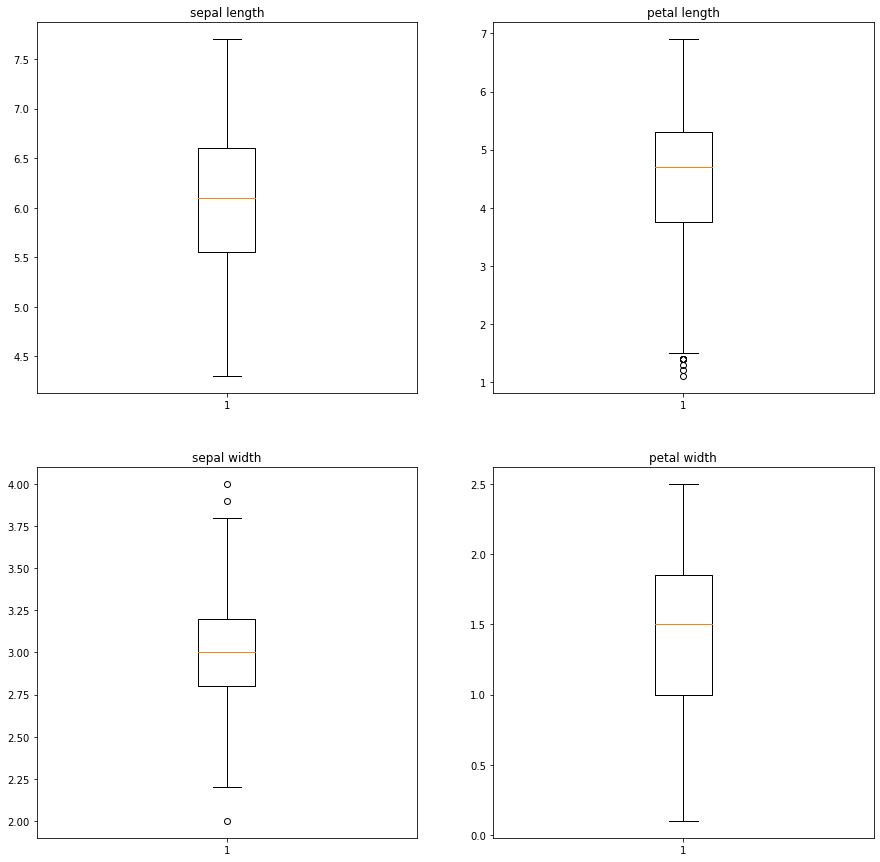

In [8]:
fig, axs = plt.subplots(2, 2, figsize=(15, 15))

axs[0, 0].boxplot(train['sepal_length'])
axs[0, 0].set_title('sepal length')

axs[0, 1].boxplot(train['petal_length'])
axs[0, 1].set_title('petal length')

axs[1, 0].boxplot(train['sepal_width'])
axs[1, 0].set_title('sepal width')

axs[1, 1].boxplot(train['petal_width'])
axs[1, 1].set_title('petal width')

plt.show()

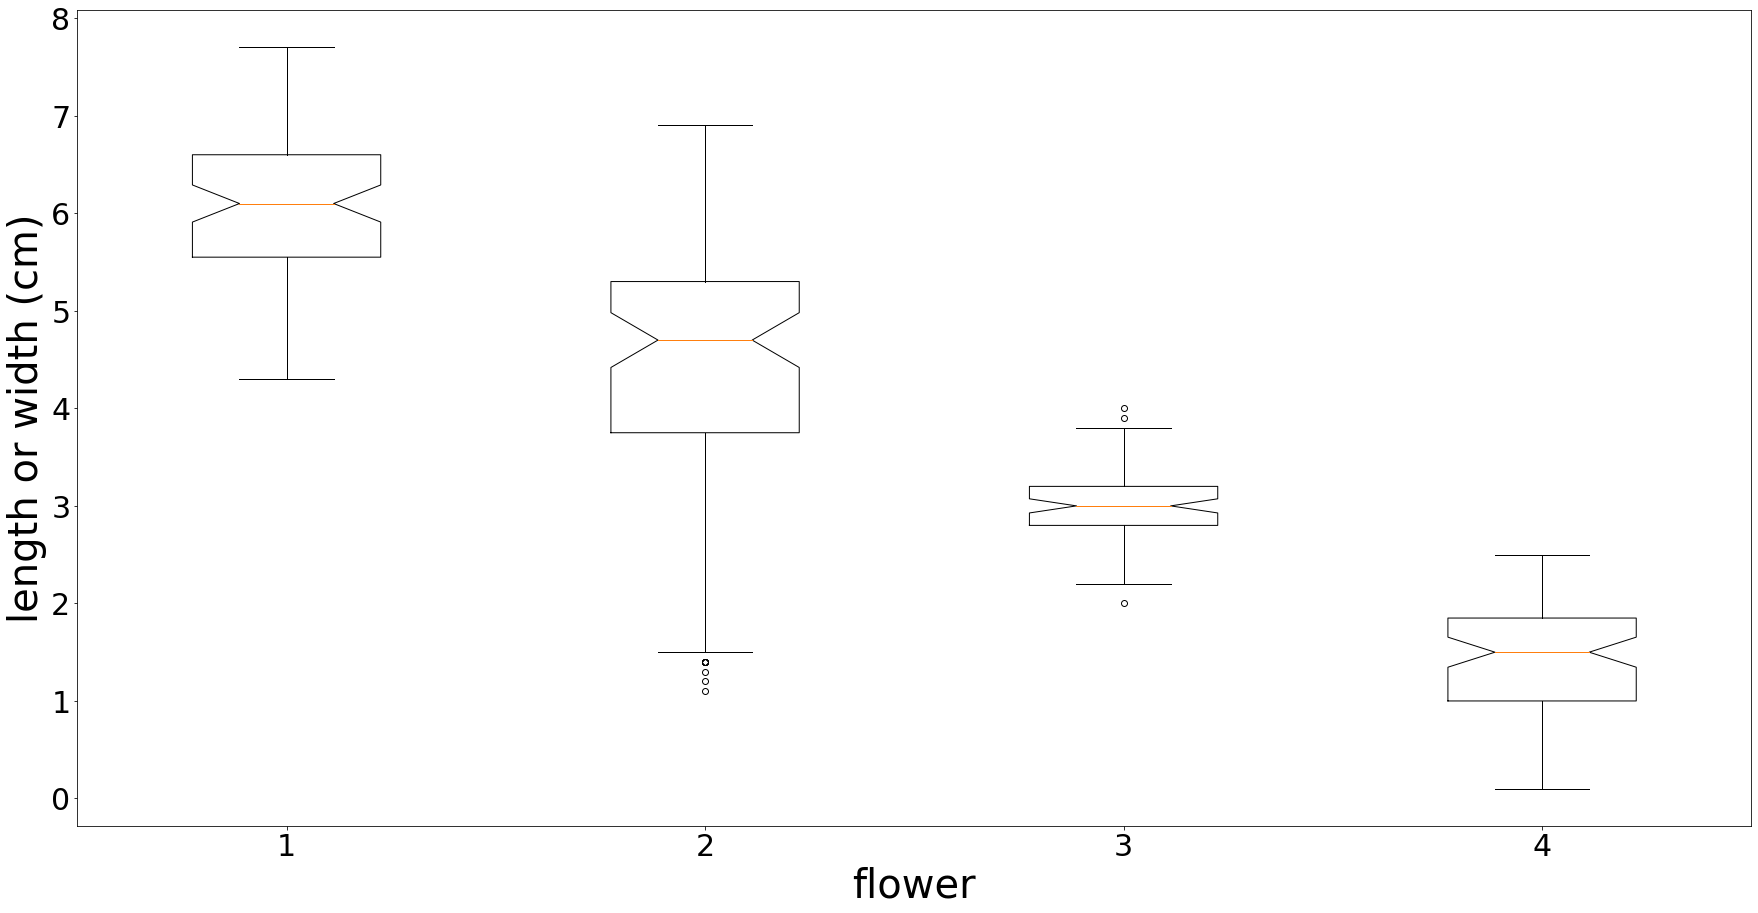

In [9]:
# 데이터 모음집
data = [train['sepal_length'], train['petal_length'], 
        train['sepal_width'], train['petal_width']]

fig, ax = plt.subplots(figsize=(30, 15))

bp = ax.boxplot(data, notch=True)

ax.set_xlabel('flower', fontsize = 40)
ax.set_ylabel('length or width (cm)', fontsize = 40)
ax.tick_params(axis='x', labelsize = 30)
ax.tick_params(axis='y', labelsize = 30)
plt.show()

## Violin plot

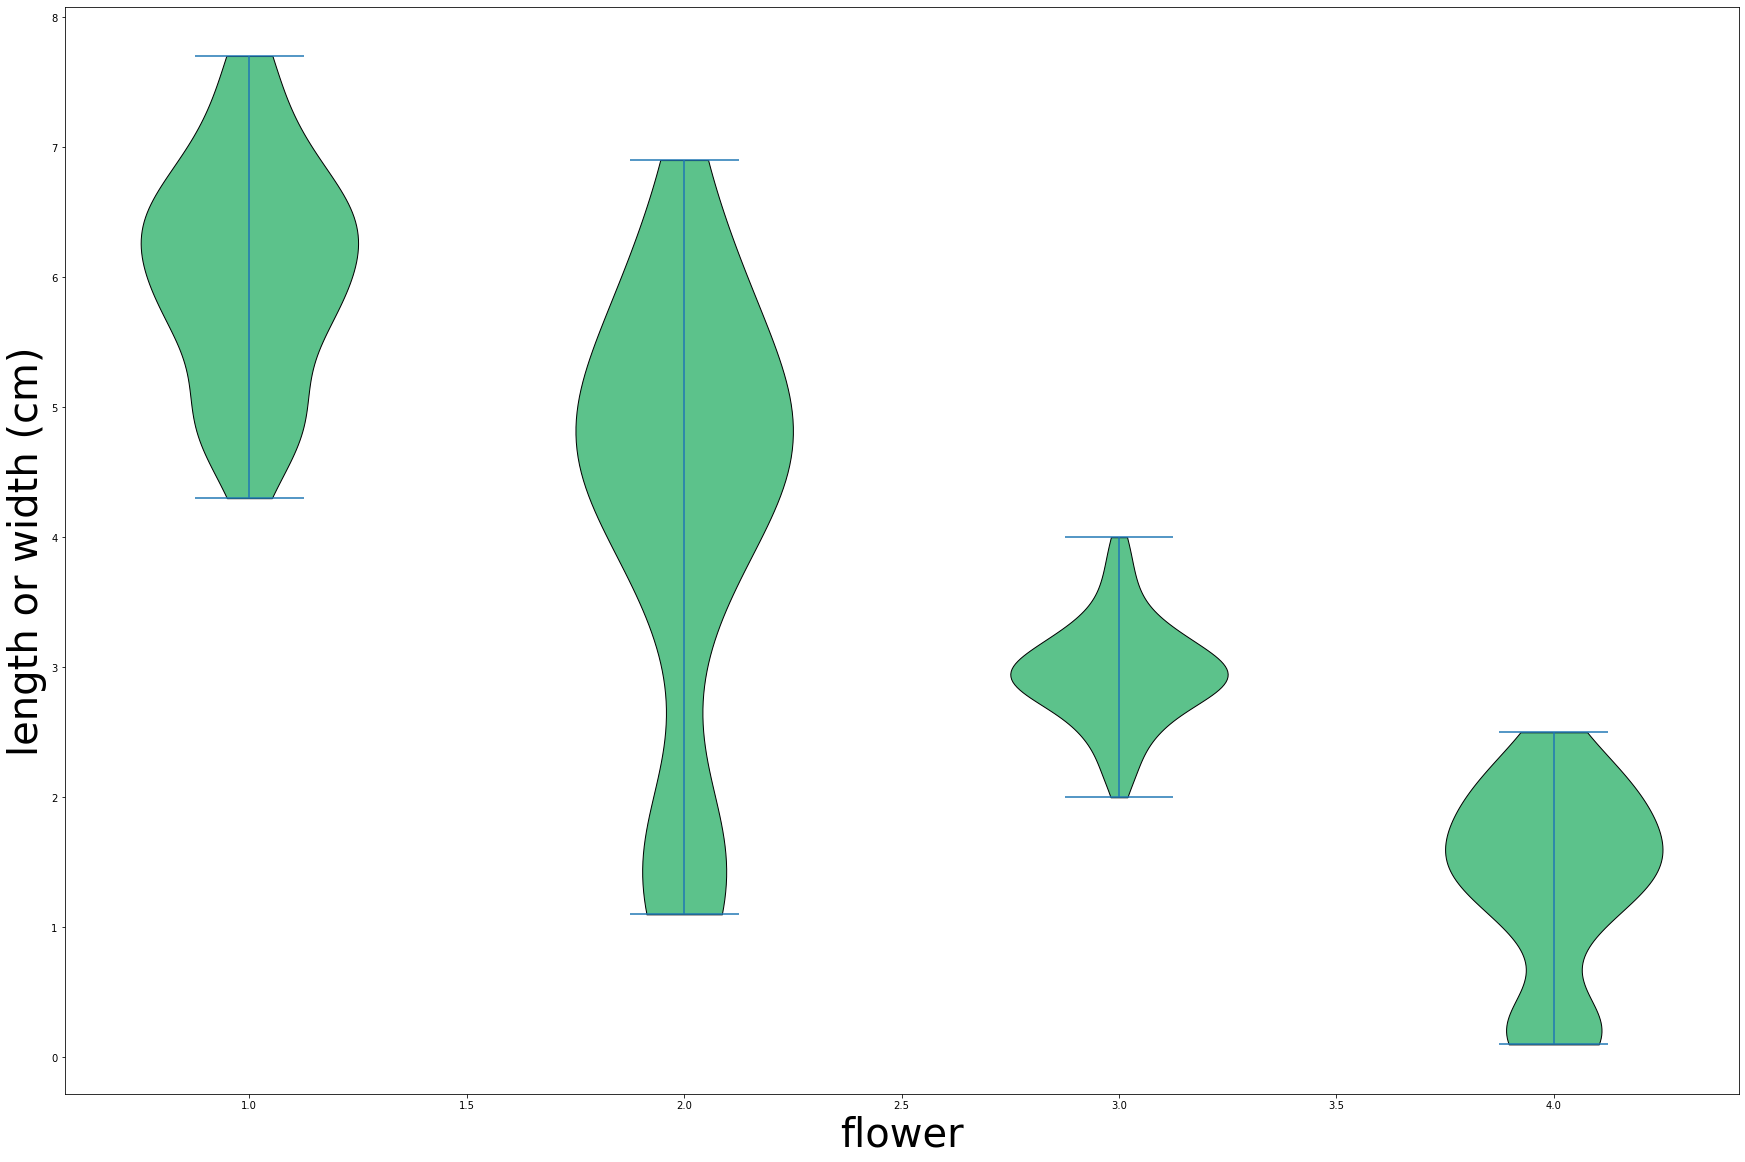

In [10]:
fig, ax = plt.subplots(figsize = (30, 20))

ax.set_xlabel('flower', fontsize = 40)
ax.set_ylabel('length or width (cm)', fontsize = 40)
parts = ax.violinplot(data, showmeans = False, showmedians=False)

ax.xaxis.set_tick_params(direction = 'out')
ax.xaxis.set_ticks_position('bottom')

for pc in parts['bodies']:
    pc.set_facecolor('#5cc28b')
    pc.set_edgecolor('black')
    pc.set_alpha(1)

plt.show()

## Scatter

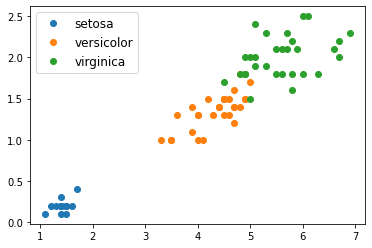

In [11]:
species = train.groupby('species')

fig, ax = plt.subplots()
for name, kind in species:
    ax.plot(kind.petal_length, kind.petal_width, marker = 'o', linestyle='', label = name)

ax.legend(fontsize = 12, loc = 'upper left')
plt.show()

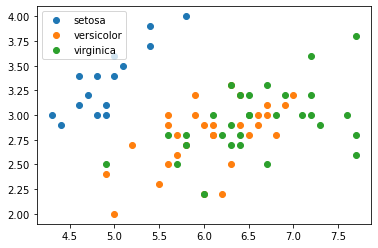

In [12]:
fig, ax = plt.subplots()

for name, kind in species:
    ax.plot(kind.sepal_length, kind.sepal_width, marker = 'o', 
            linestyle = '', label = name)

ax.legend(fontsize = 10, loc = 'upper left')
plt.show()

## Bar plot

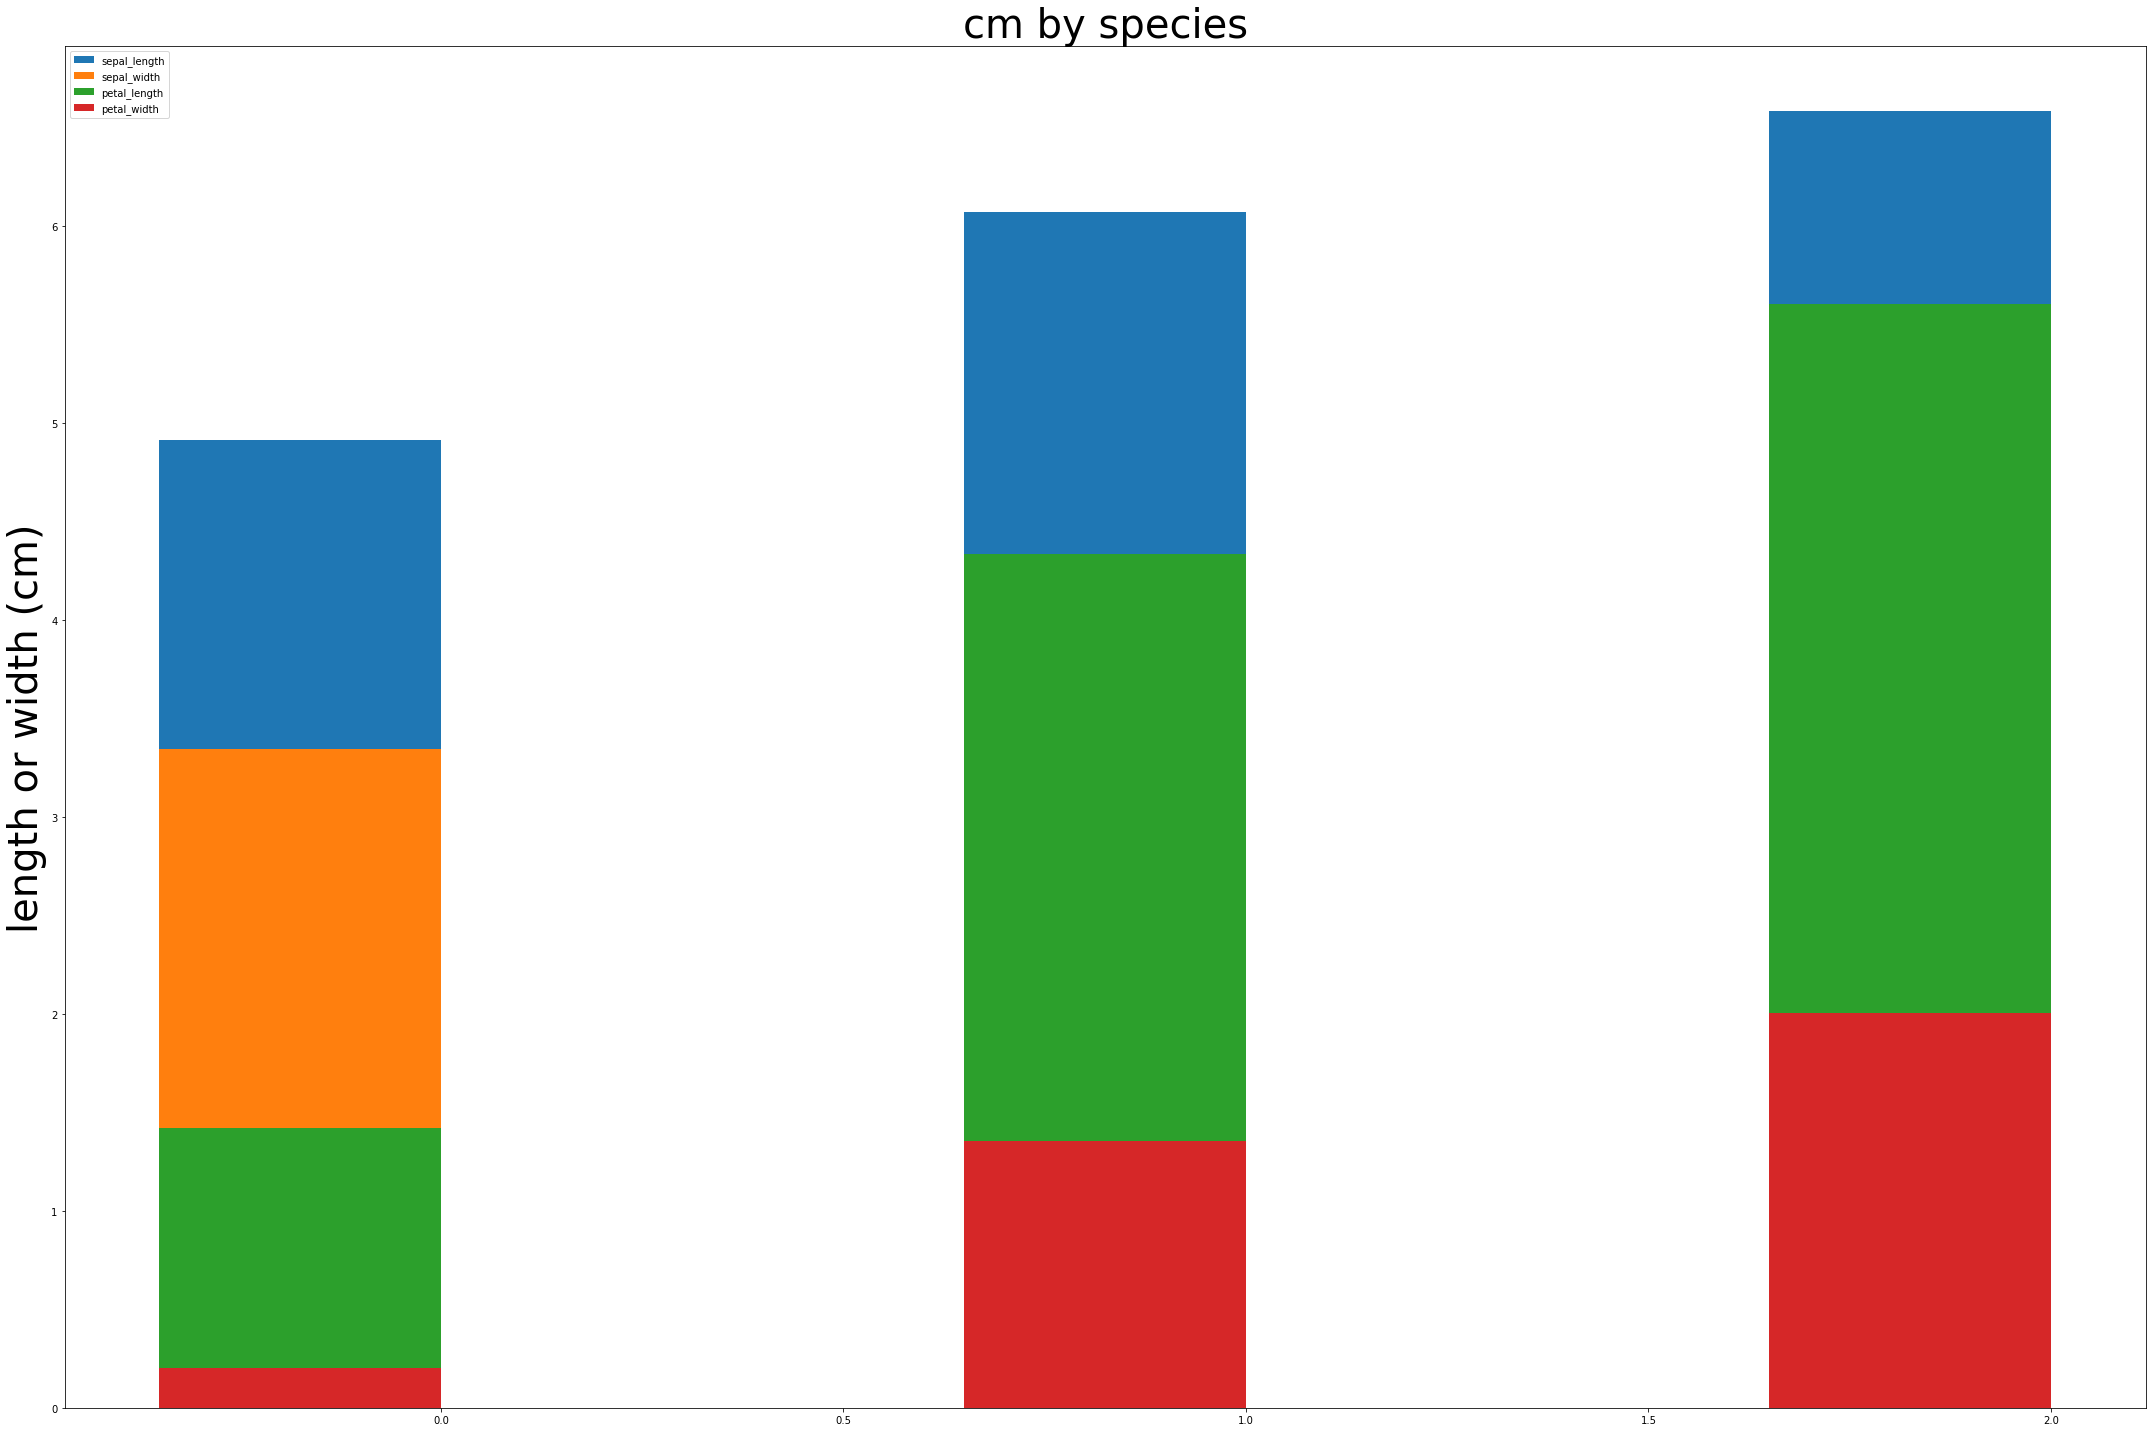

In [13]:
sepal_length_mean = []
sepal_width_mean = []
petal_length_mean = []
petal_width_mean = []
label = ['setosa', 'versicolor', 'virginica']

# 종류를 기준으로 각 index 별로 평균 값을 더함
for name, kind in species:
    sepal_length_mean.append(kind.sepal_length.mean())
    sepal_width_mean.append(kind.sepal_width.mean())
    petal_length_mean.append(kind.petal_length.mean())
    petal_width_mean.append(kind.petal_width.mean())

x = np.arange(len(label))
width = 0.35
    
fig, ax = plt.subplots(figsize = (30, 20))
sepal_length_bar = ax.bar(x-width/2, sepal_length_mean, width, label='sepal_length')
sepal_width_bar = ax.bar(x-width/2, sepal_width_mean, width, label='sepal_width')
petal_length_bar = ax.bar(x-width/2, petal_length_mean, width, label='petal_length')
petal_width_bar = ax.bar(x-width/2, petal_width_mean, width, label='petal_width')

ax.set_ylabel('length or width (cm)', fontsize = 40)
ax.set_title('cm by species', fontsize = 40)
ax.legend()

fig.tight_layout()

plt.show()

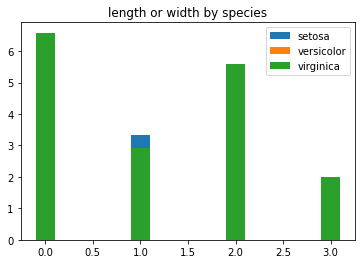

In [14]:
setasa_data = species.get_group('setosa')
versicolor_data = species.get_group('versicolor')
virginica_data = species.get_group('virginica')

sp = ['setosa', 'versicolor', 'virginica']
label = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
setosa = [setasa_data.sepal_length.mean(),
         setasa_data.sepal_width.mean(),
         setasa_data.petal_length.mean(),
         setasa_data.petal_width.mean()]
versicolor = [versicolor_data.sepal_length.mean(),
         versicolor_data.sepal_width.mean(),
         versicolor_data.petal_length.mean(),
         versicolor_data.petal_width.mean()]
virginica = [virginica_data.sepal_length.mean(),
         virginica_data.sepal_width.mean(),
         virginica_data.petal_length.mean(),
         virginica_data.petal_width.mean()]


fig, ax = plt.subplots()

ind = np.arange(4)
width = 0.2

ax.bar(ind, setosa, width, label = 'setosa')
ax.bar(ind, versicolor, width, label = 'versicolor')
ax.bar(ind, virginica, width, label = 'virginica')

ax.set_title('length or width by species')

ax.legend()
plt.show()

- 여기서 참고해야 되는 것은 Groupby Bar Chart는 2개 기준이지 3개로 넘어갈 경우에는 matplotlib을 사용하지 않는 것을 

## 수평 Bar Chart 그리기

In [15]:
iris_data = {
    'sepal_length': [
        train[train["species"] == "setosa"]["sepal_length"].mean(),
        train[train["species"] == "versicolor"]["sepal_length"].mean(),
        train[train["species"] == "virginica"]["sepal_length"].mean()
    ],
    'sepal_width': [
        train[train["species"] == "setosa"]["sepal_width"].mean(),
        train[train["species"] == "versicolor"]["sepal_width"].mean(),
        train[train["species"] == "virginica"]["sepal_width"].mean()
    ],
    'petal_length': [
        train[train["species"] == "setosa"]["petal_length"].mean(),
        train[train["species"] == "versicolor"]["petal_length"].mean(),
        train[train["species"] == "virginica"]["petal_length"].mean()
    ],
    'petal_width': [
        train[train["species"] == "setosa"]["petal_width"].mean(),
        train[train["species"] == "versicolor"]["petal_width"].mean(),
        train[train["species"] == "virginica"]["petal_width"].mean()
    ]
}

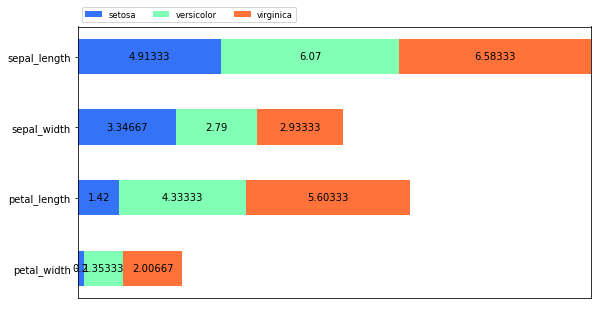

In [27]:
category_names = ['setosa', 'versicolor', 'virginica']

def iris_horizontal_bar(data, category_names):
    labels = list(data.keys())
    value = np.array(list(data.values()))
    value_cum = value.cumsum(axis = 1)
    category_colors = plt.get_cmap('rainbow')(np.linspace(0.15, 0.85, 
                                                        value.shape[1]))
    
    fig, ax = plt.subplots(figsize=(9.2 , 5))
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(value, axis = 1).max())
    
    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        widths = value[:, i]
        starts = value_cum[:, i] - widths
        rects = ax.barh(labels, widths, left=starts, height = 0.5, label=colname,
                       color=color)
        
        r, g, b, _ = color
        text_color = 'black' if r * g * b < 0.5 else 'darkgrey'
        ax.bar_label(rects, label_type='center', color=text_color)
    
    ax.legend(ncol=len(category_names), bbox_to_anchor=(0, 1),
             loc='lower left', fontsize='small')
    
    return fig, ax

iris_horizontal_bar(iris_data, category_names)
plt.show()

### 오류 1 : 'AxesSubplot' object has no attribute 'bar_label'

- matplotlib이 최신 버전이 아닌 경우 발생하는 오류이다.

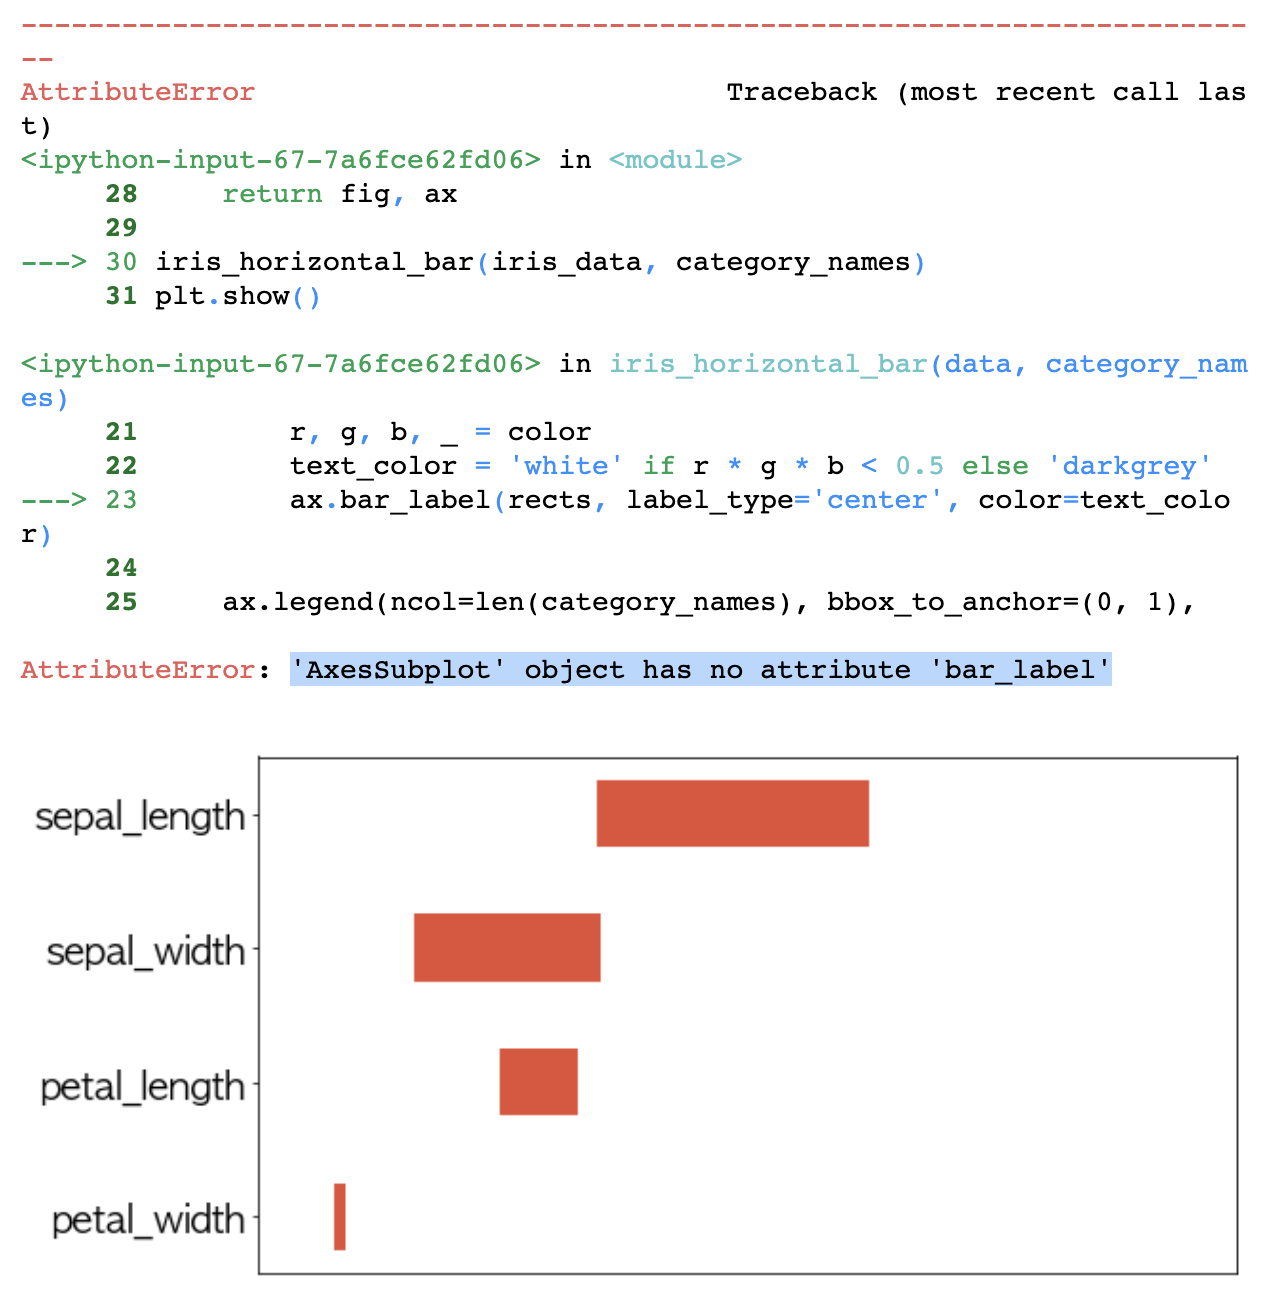

In [20]:
Image(filename="bar_label_error.png")

## ticked patheffect를 이용한 Line

In [8]:
from matplotlib import patheffects

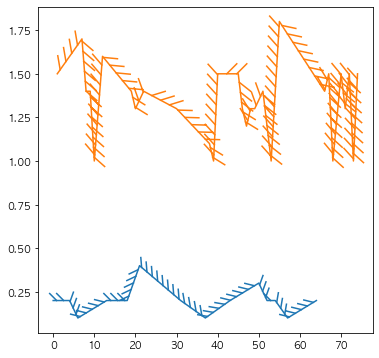

In [58]:
fig, ax = plt.subplots(figsize=(6, 6))
ax.plot(train[train['species'] == 'setosa']['id'], train[train['species'] == 'setosa']['petal_width'],
       label="Setosa Petal Width", path_effects = [
           patheffects.withTickedStroke(spacing=7, angle=135)
       ])

ax.plot(train[train['species'] == 'versicolor']['id'], train[train['species'] == 'versicolor']['petal_width'],
       label="Versicolor Petal Width", path_effects = [
           patheffects.withTickedStroke()
       ])

## Spectrum을 이용한 line Chart

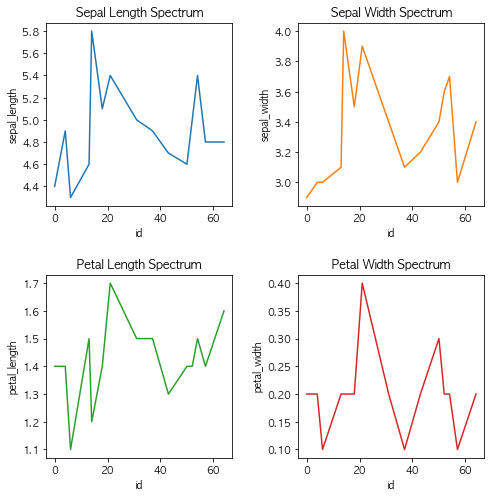

In [55]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(7, 7))

axs[0, 0].set_title("Sepal Length Spectrum")
axs[0, 0].plot(train[train['species'] == 'setosa']['id'], train[train['species'] == 'setosa']['sepal_length'], color='C0')
axs[0, 0].set_xlabel("id")
axs[0, 0].set_ylabel("sepal_length")

axs[0, 1].set_title("Sepal Width Spectrum")
axs[0, 1].plot(train[train['species'] == 'setosa']['id'], train[train['species'] == 'setosa']['sepal_width'], color='C1')
axs[0, 1].set_xlabel("id")
axs[0, 1].set_ylabel("sepal_width")

axs[1, 0].set_title("Petal Length Spectrum")
axs[1, 0].plot(train[train['species'] == 'setosa']['id'], train[train['species'] == 'setosa']['petal_length'], color='C2')
axs[1, 0].set_xlabel("id")
axs[1, 0].set_ylabel("petal_length")

axs[1, 1].set_title("Petal Width Spectrum")
axs[1, 1].plot(train[train['species'] == 'setosa']['id'], train[train['species'] == 'setosa']['petal_width'], color='C3')
axs[1, 1].set_xlabel("id")
axs[1, 1].set_ylabel("petal_width")

fig.tight_layout(pad=1, w_pad=2, h_pad=2)
plt.rcParams['font.size'] = 10
plt.show()

## Pie

In [28]:
train.head()

,id,species,sepal_length,petal_length,sepal_width,petal_width
0,0,setosa,4.4,1.4,2.9,0.2
1,1,versicolor,6.4,4.5,3.2,1.5
2,2,virginica,6.2,4.8,2.8,1.8
3,3,virginica,7.2,6.1,3.6,2.5
4,4,setosa,4.9,1.4,3.0,0.2


In [29]:
train[train["species"] == "setosa"]["sepal_length"].mean()

4.913333333333333

In [9]:
sepal_length_data = [
    train[train["species"] == "setosa"]["sepal_length"].mean(),
    train[train["species"] == "versicolor"]["sepal_length"].mean(),
    train[train["species"] == "virginica"]["sepal_length"].mean()
]

sepal_width_data = [
    train[train["species"] == "setosa"]["sepal_width"].mean(),
    train[train["species"] == "versicolor"]["sepal_width"].mean(),
    train[train["species"] == "virginica"]["sepal_width"].mean()
]

petal_length_data = [
    train[train["species"] == "setosa"]["petal_length"].mean(),
    train[train["species"] == "versicolor"]["petal_length"].mean(),
    train[train["species"] == "virginica"]["petal_length"].mean()
]

petal_width_data = [
    train[train["species"] == "setosa"]["petal_width"].mean(),
    train[train["species"] == "versicolor"]["petal_width"].mean(),
    train[train["species"] == "virginica"]["petal_width"].mean()
]

## Basic Pie

### autopct customizing

In [31]:
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct * total /100.0))
        return '{p:.2f}%  ({v:d})'.format(p = pct, v=val)
    return my_autopct

/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 45936 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 53552 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 45936 missing from current font.
  font.set_text(s, 0, flags=flags)
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0, flags=flags)
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 53552 missing from curre

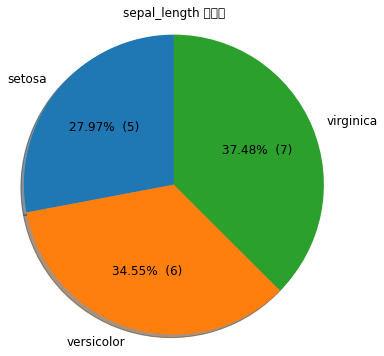

In [32]:
labels = ['setosa', 'versicolor', 'virginica']
# figsize는 가로 세로 길이로 화면 크기를 말함
fig1, ax1 = plt.subplots(figsize=(6, 6))
ax1.pie(sepal_length_data, labels=labels, shadow=True, 
        autopct=make_autopct(sepal_length_data), 
        startangle=90, textprops = {'fontsize': 12})
ax1.axis('equal')

# font size를 수정하는 방법 : plt.rcParams['font.size'] = 40
# 타이틀을 집어넣는 방법
plt.title("sepal_length 데이터")
plt.show()

## 깨지는 한글 폰트 해결하기 (feat. mac)

In [33]:
from matplotlib import rc

%matplotlib inline

rc('font', family='AppleGothic')

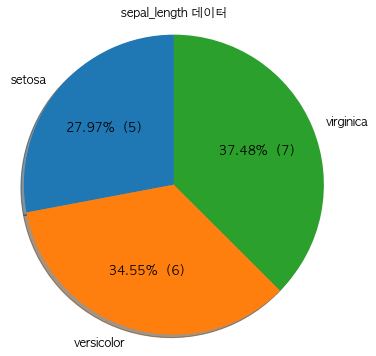

In [34]:
labels = ['setosa', 'versicolor', 'virginica']
# figsize는 가로 세로 길이로 화면 크기를 말함
fig1, ax1 = plt.subplots(figsize=(6, 6))
ax1.pie(sepal_length_data, labels=labels, shadow=True, 
        autopct=make_autopct(sepal_length_data), 
        startangle=90, textprops = {'fontsize': 12})
ax1.axis('equal')

# font size를 수정하는 방법 : plt.rcParams['font.size'] = 40
# 타이틀을 집어넣는 방법
plt.title("sepal_length 데이터")
plt.show()

## Pie Demo2

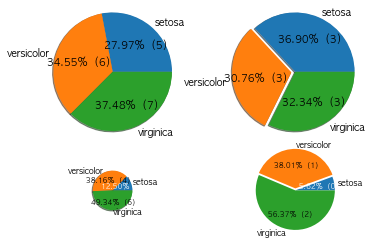

In [35]:
fig, axs = plt.subplots(2, 2)

# 기본 Pie Chart
axs[0, 0].pie(sepal_length_data, labels=labels, 
              autopct=make_autopct(sepal_length_data), shadow=True, radius=1.5)

# explode
axs[0, 1].pie(sepal_width_data, labels=labels, 
              autopct=make_autopct(sepal_width_data), shadow=True, radius=1.5,
             explode=(0, 0.1, 0))

# 더 작은 크가의 pie일 경우 사이즈와 문자 크기 조절
patches, texts, autotexts = axs[1, 0].pie(petal_length_data, labels=labels,
                                         autopct=make_autopct(petal_length_data),
                                         textprops={'size': 'smaller'},
                                         shadow=True, radius=0.5)

# pie 안 텍스트 크기를 더 작게
plt.setp(autotexts, size='x-small')
autotexts[0].set_color('white')

patches, texts, autotexts = axs[1, 1].pie(petal_width_data, labels=labels,
                                         autopct=make_autopct(petal_width_data),
                                         textprops={'size': 'smaller'},
                                         shadow=False, radius=1,
                                         explode=(0, 0.05, 0))

plt.setp(autotexts, size='x-small')
autotexts[0].set_color('white')

plt.show()

## Pie chart에 Label 붙이기

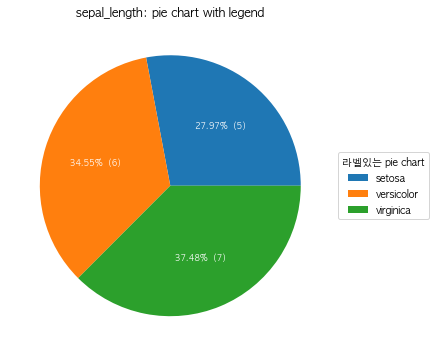

In [36]:
legend = ['setosa', 'versicolor', 'virginica']
fig, ax = plt.subplots(figsize=(8, 6), subplot_kw=dict(aspect="equal"))

wedges, texts, autotexts = ax.pie(sepal_length_data, 
                                  autopct=make_autopct(sepal_length_data),
                                 textprops=dict(color="w"))
ax.legend(wedges, legend, title="라벨있는 pie chart",
         loc = "center left",
         bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=8, weight="bold")
ax.set_title("sepal_length: pie chart with legend")
plt.show()

### bbox_to_anchor 에 대해서

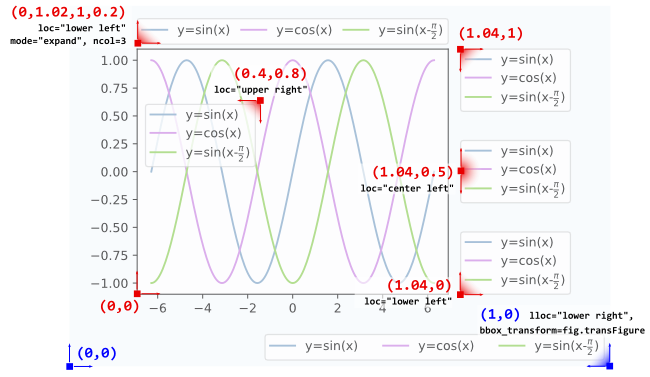

In [37]:
Image(filename="bbox_to_anchor.png")

- bbox_to_anchor은 바운딩 박스 밖에서 범례를 위치시키는 방법이다.
- 기본적으로 (x, y) 형태의 2차원 좌표계를 의미하고 있다.
- 만약의 변수가 4개 라면 (x, y, width, height)의 의미로 범례의 크기까지 포함하는 것이다.

## 도넛 모양 Pie Chart

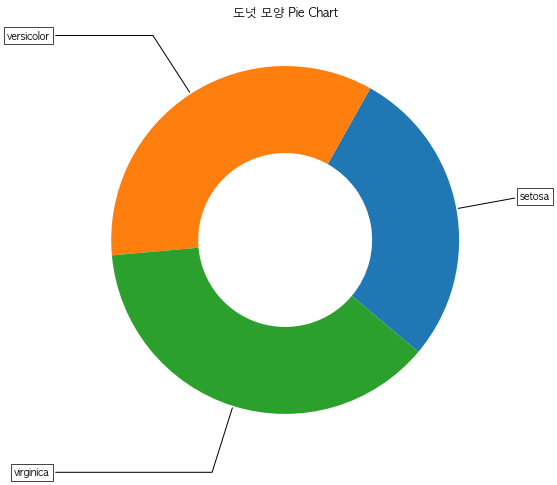

In [38]:
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(aspect="equal"))

wedges, texts = ax.pie(sepal_length_data, wedgeprops=dict(width=0.5), startangle=-40)

bbox_props = dict(boxstyle="square, pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"), bbox=bbox_props,
         zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle, angleA=0, angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(legend[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
               horizontalalignment=horizontalalignment, **kw)
    
ax.set_title("도넛 모양 Pie Chart")
plt.rcParams["font.size"] = 20
plt.show()

## Pyplot

### 1. Basic Pyplot

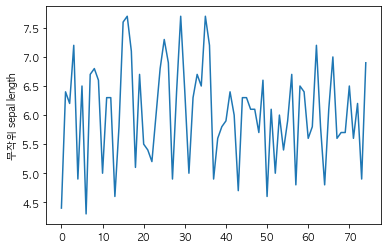

In [59]:
plt.plot(train['id'], train['sepal_length'])
plt.ylabel('무작위 sepal length')
plt.show()

### 2. plot 명칭하기

In [93]:
# sepal_length max 값과 위치 찾기 찾기
sepal_length_max = max(train["sepal_length"])
text_sepal_length_max = max(train["sepal_length"]) + 0.5
id_location = train[train["sepal_length"] == sepal_length_max]["id"]
text_id_location = train[train["sepal_length"] == sepal_length_max]["id"] = 5

fig, ax = plt.subplots()

line, = ax.plot(train["id"], train["sepal_length"], lw = 2)

ax.annotate('sepal_length_max', xy = (id_location, sepal_length_max),
           xytext=(text_id_location, text_sepal_length_max),
           arrowprops=dict(facecolor='black', shrink=0.05))

ax.set_ylim(3, 9)
plt.show()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


TypeError: cannot convert the series to <class 'float'>

<Figure size 432x288 with 1 Axes>

### 오류 1: cannot convert the series to <class 'float'>

In [92]:
type(id_location)

list

- id_location이 Series이니까 astype('float')를 이용해 형식을 바꿔줄 수 있지만 내용물을 확인해보자

In [94]:
id_location

16    16
29    29
35    35
Name: id, dtype: int64

- 이 경우 list화 한다음에 3가지 경우에 대해서 annotation을 붙여주자

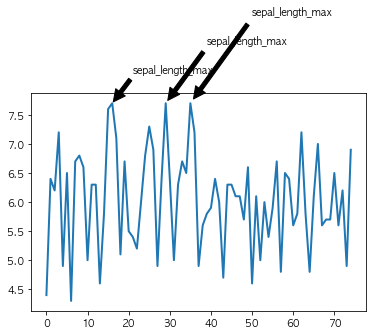

In [104]:
# sepal_length max 값과 위치 찾기 찾기
sepal_length_max = max(train["sepal_length"])
id_location = train[train["sepal_length"] == sepal_length_max]["id"]

fig, ax = plt.subplots()

line, = ax.plot(train["id"], train["sepal_length"], lw = 2)

for i, j in zip(list(id_location), [1, 2, 3]):    
    ax.annotate('sepal_length_max', xy = (i, sepal_length_max),
               xytext=(i + 5*j, sepal_length_max + 0.5*j),
               arrowprops=dict(facecolor='black', shrink=0.05))


plt.show()

### 3. Pyplot Text

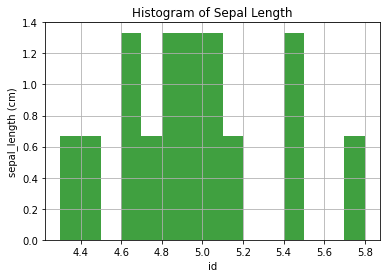

In [20]:
n, bins, patches = plt.hist(train[train["species"] == "setosa"]["sepal_length"],
                           len(train[train["species"] == "setosa"]["sepal_length"]),
                            density=True, facecolor='g', alpha=0.75)

plt.xlabel("id")
plt.ylabel("sepal_length (cm)")
plt.title("Histogram of Sepal Length")
plt.grid(True)
plt.show()

## 텍스트 강조하는 방법

- $로 텍스트를 감싸고 x 위에 점 2개를 놓으려면 \ddot{텍스트}를 이용하면 된다.

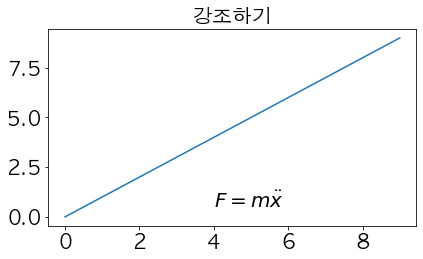

In [39]:
fig, ax = plt.subplots()
ax.plot(range(10))
ax.set_title(r'강조하기', fontsize=20)
ax.text(4, 0.5, r'$F=m\ddot{x}$')
fig.tight_layout()

plt.show()

## fig.tight_layout() 조절하기

In [52]:
plt.rcParams['savefig.facecolor'] = "0.8"

def example_plot(ax, fontsize = 12):
    ax.plot([1, 2])
    ax.locator_params(nbins = 3)
    ax.set_xlabel('x_label', fontsize=fontsize)
    ax.set_ylabel('y_label', fontsize=fontsize)
    ax.set_title('Title', fontsize=fontsize)

### tight_layout()이 없는 경우

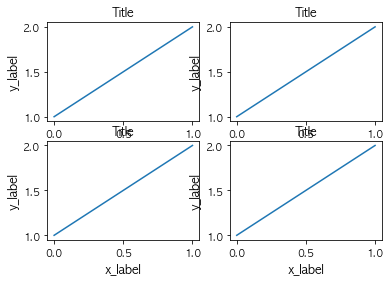

In [51]:
plt.close('all')

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2)
example_plot(ax1)
example_plot(ax2)
example_plot(ax3)
example_plot(ax4)

- 이 경우 각각의 label과 plot이 겹치는 경우가 발생한다

### tight_layout()이 있는 경우

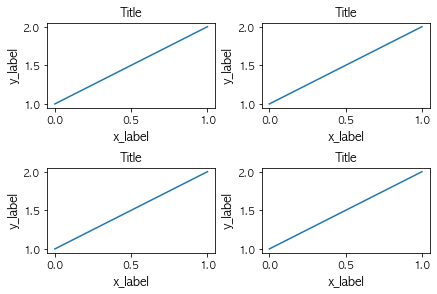

In [54]:
plt.close('all')

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2)
example_plot(ax1)
example_plot(ax2)
example_plot(ax3)
example_plot(ax4)
plt.tight_layout(pad = 0.4, w_pad = 0.5, h_pad=1.0)

- 각 fig들이 겹치지 않고 잘 나타날 수 있음을 알 수 있다.
- pad는 web에서의 padding과 비슷하게 박스 안쪽 padding이다.
- w_pad, h_pad 각각은 넓이, 높이와 대응되는 padding